# **Set Up and Imports**

In [1]:
# Links Referred

# 1: LSTM: https://www.kaggle.com/code/madz2000/nlp-using-glove-embeddings-99-87-accuracy
# 2: BERT and RoBERTa: https://www.kaggle.com/code/jaskaransingh/fake-news-classification-bert-roberta
# 3: Data: https://www.kaggle.com/datasets/clmentbisaillon/fake-and-real-news-dataset

In [2]:
# Mount Google Drive
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
# Display Properties
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
# Set Working Directory
%cd drive/MyDrive/DLProject

/content/drive/MyDrive/DLProject


In [6]:
# General Imports
import string
from bs4 import BeautifulSoup
from wordcloud import WordCloud
import re

In [7]:
# Data Science Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [8]:
# Machine Learning Imports
import nltk
import keras
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from keras.preprocessing import text, sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, Dropout
from tensorflow.keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau

# **Dataset Import**

In [9]:
# Load Dataset
true_df = pd.read_csv("./data/True.csv")
false_df = pd.read_csv("./data/Fake.csv")

In [10]:
# Visualization
true_df.head()
false_df.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [11]:
# Setting Category Column
true_df['category'] = 1
false_df['category'] = 0

# Merging Dataframes
news_df = pd.concat([true_df,false_df])
news_df

,title,text,subject,date,category
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1
...,...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0


# **Visualizations I**

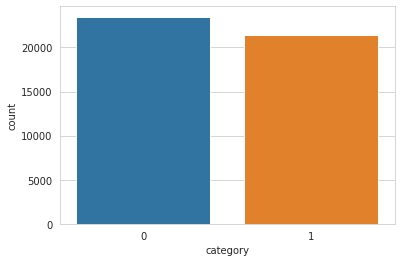

In [ ]:
# Visualization of Counts
sns.set_style('whitegrid')
sns.countplot(x=news_df.category)

In [ ]:
# News Categories
news_df['subject'].value_counts()

politicsNews       11272
worldnews          10145
News                9050
politics            6841
left-news           4459
Government News     1570
US_News              783
Middle-east          778
Name: subject, dtype: int64

<Figure size 864x576 with 0 Axes>

[Text(0, 0, 'politicsNews'),
 Text(0, 0, 'worldnews'),
 Text(0, 0, 'News'),
 Text(0, 0, 'politics'),
 Text(0, 0, 'Government News'),
 Text(0, 0, 'left-news'),
 Text(0, 0, 'US_News'),
 Text(0, 0, 'Middle-east')]

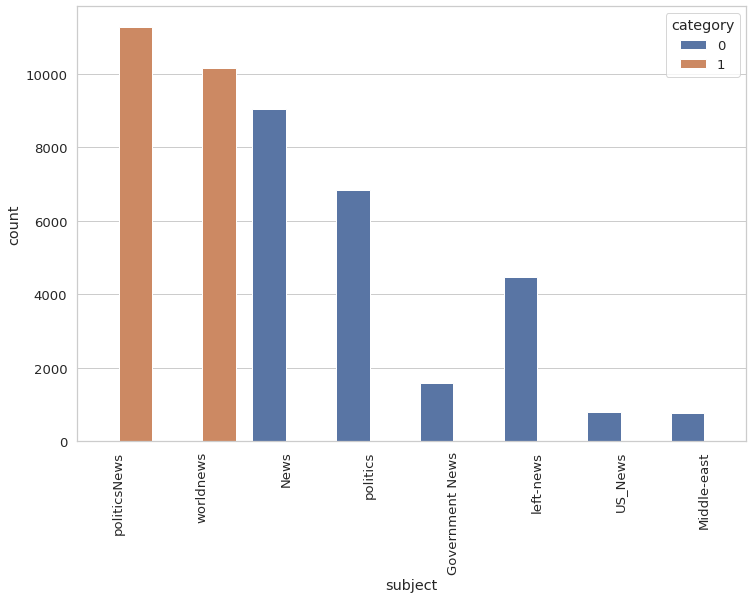

In [ ]:
# Counting News based on Subject and Category
plt.figure(figsize=(12,8))
sns.set_theme(style="whitegrid", font_scale=1.2)
chart = sns.countplot(x="subject", hue="category" , data=news_df)
chart.set_xticklabels(chart.get_xticklabels(),rotation=90)

In [ ]:
# Merging Text and Removing Unwanted Columns
news_df['text'] = news_df['text'] + " " + news_df['title']
del news_df['title']
del news_df['subject']
del news_df['date']

# **Cleaning the Data**

In [ ]:
# Get Stop Words
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
punctuation = list(string.punctuation)
stop_words.update(punctuation)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# Data Cleaning Functions
def strip_html(text: str):
  parsed_text = BeautifulSoup(text, 'html.parser')
  text = parsed_text.get_text()
  return text

# Remove Stop Words
def remove_stop_words(text: str):
  text_list = [word for word in text.split() if word.lower() not in stop_words]
  text = " ".join(text_list)
  return text

# Remove Bias
def remove_bias(text: str):
  pattern = '^.*\(Reuters\)'
  text = re.sub(pattern, '', text)
  return text

# Function encapulating all Data Cleaning Functions
def clean_text(text):
  text = strip_html(text)
  text = remove_stop_words(text)
  text = remove_bias(text)
  return text

In [ ]:
# Apply Data Cleaning
news_df['cleaned_text'] = news_df['text'].apply(clean_text)

# **Visualizations II**

In [ ]:
# Create a Representative Word Cloud
def word_cloud_rep(text):
  plt.figure(figsize=(16,9))
  wordcloud = WordCloud(max_words=2000, width=1600, height=900, background_color='black').generate(text)
  plt.axis('off')
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.show

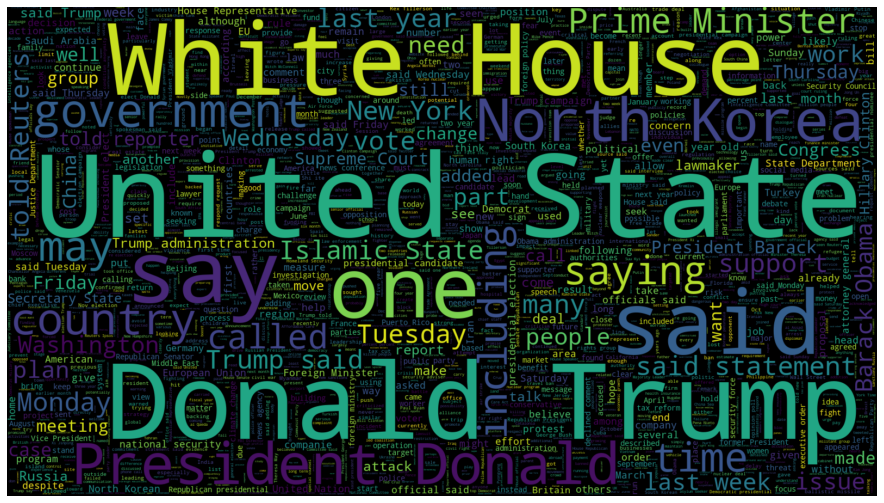

In [ ]:
# Show Real Text
word_cloud_rep(" ".join(news_df[news_df.category == 1]['cleaned_text']))

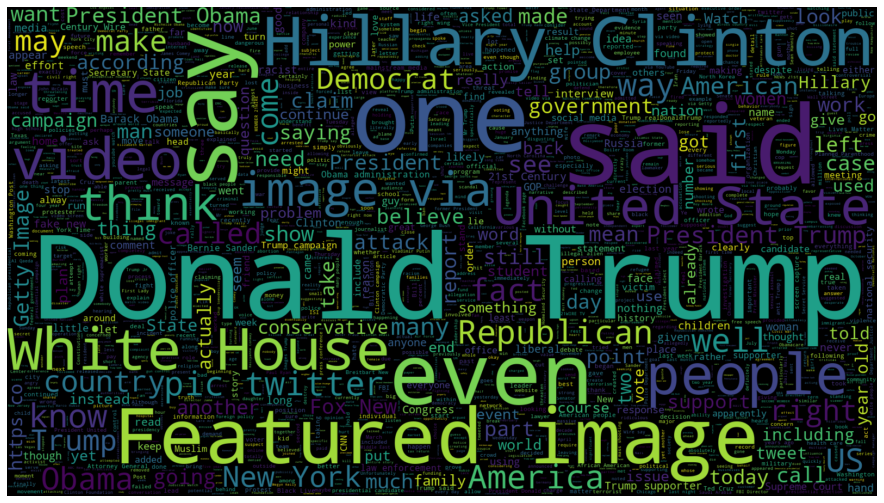

In [ ]:
# Show Fake Text
word_cloud_rep(" ".join(news_df[news_df.category == 0]['cleaned_text']))

(array([1.3373e+04, 6.6030e+03, 1.3470e+03, 7.4000e+01, 9.0000e+00,
        5.0000e+00, 3.0000e+00, 2.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([   30. ,  2015.9,  4001.8,  5987.7,  7973.6,  9959.5, 11945.4,
        13931.3, 15917.2, 17903.1, 19889. ]),
 <a list of 10 Patch objects>)

Text(0.5, 1.0, 'Real Text')

(array([2.2203e+04, 1.0030e+03, 1.5400e+02, 5.6000e+01, 3.3000e+01,
        1.0000e+01, 1.0000e+01, 2.0000e+00, 2.0000e+00, 8.0000e+00]),
 array([2.90000e+01, 4.04910e+03, 8.06920e+03, 1.20893e+04, 1.61094e+04,
        2.01295e+04, 2.41496e+04, 2.81697e+04, 3.21898e+04, 3.62099e+04,
        4.02300e+04]),
 <a list of 10 Patch objects>)

Text(0.5, 1.0, 'Fake Text')

Text(0.5, 0.98, 'Characters in texts')

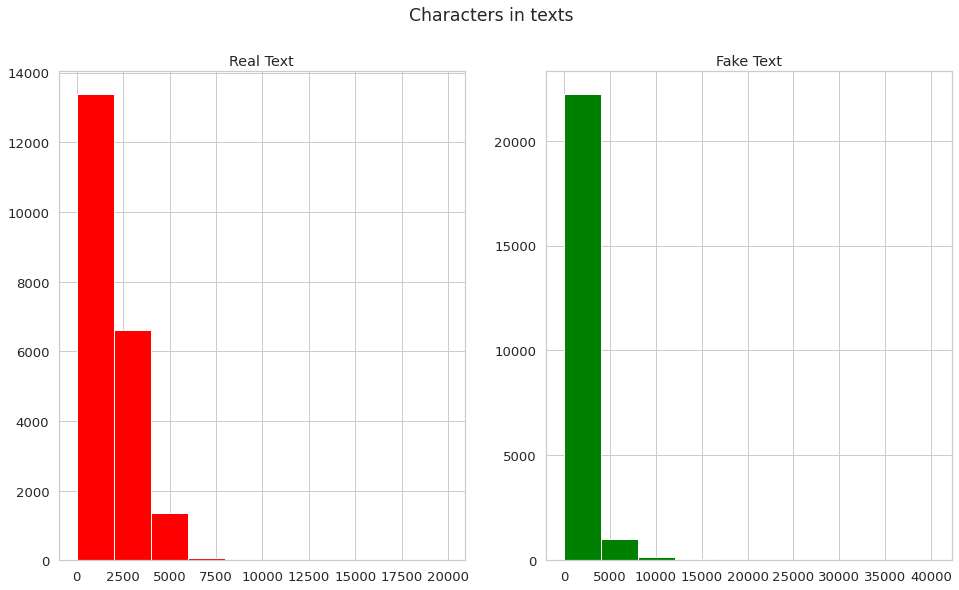

In [ ]:
# Comparing number of characters per article
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,9))

text_len = news_df[news_df['category'] == 1]['cleaned_text'].str.len()
ax1.hist(text_len, color='red')
ax1.set_title('Real Text')

text_len = news_df[news_df['category'] == 0]['cleaned_text'].str.len()
ax2.hist(text_len, color='green')
ax2.set_title('Fake Text')
fig.suptitle('Characters in texts')

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Real Text')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Fake Text')

Text(0.5, 0.98, 'Characters in texts')

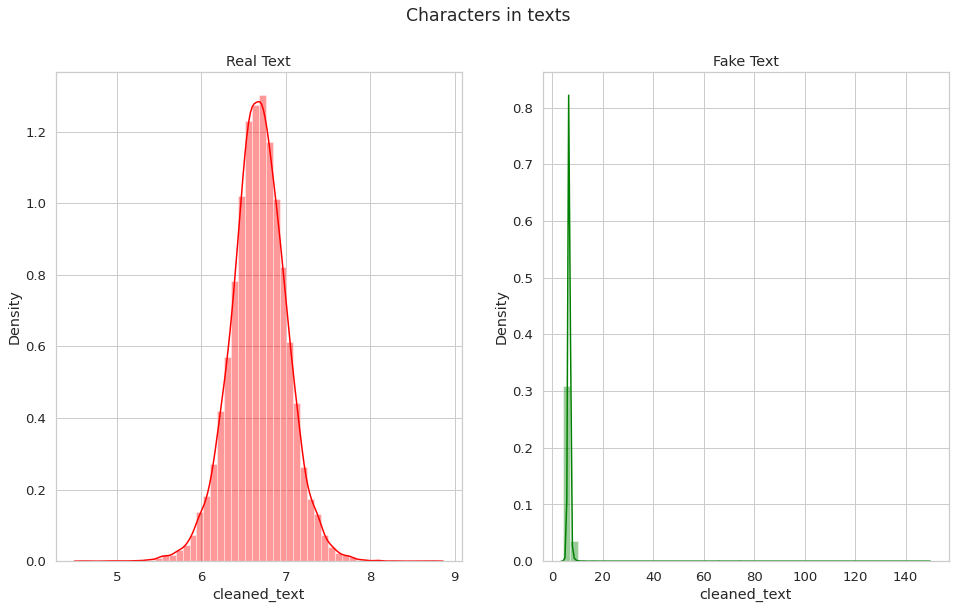

In [ ]:
# Comparing average length of each word
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,9))

text_len = news_df[news_df['category'] == 1]['cleaned_text'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(text_len.map(lambda x: np.mean(x)), ax=ax1, color='red')
ax1.set_title('Real Text')

text_len = news_df[news_df['category'] == 0]['cleaned_text'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(text_len.map(lambda x: np.mean(x)), ax=ax2, color='green')
ax2.set_title('Fake Text')
fig.suptitle('Characters in texts')

plt.show()

In [ ]:
# CountVectorizer will give us ngrams for each word, ngram range eg: (1, 2): creates unigrams and bigrams
def get_top_text_ngrams(corpus, n, g):

    vec = CountVectorizer(ngram_range=(g, g)).fit(corpus)

    # Transforms document into: '(x, y) count' - In document x, word indexed as y, occurs count times.
    bag_of_words = vec.transform(corpus)
    # Total count of each word in all documents
    sum_words = bag_of_words.sum(axis=0)

    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

<Figure size 1152x648 with 0 Axes>

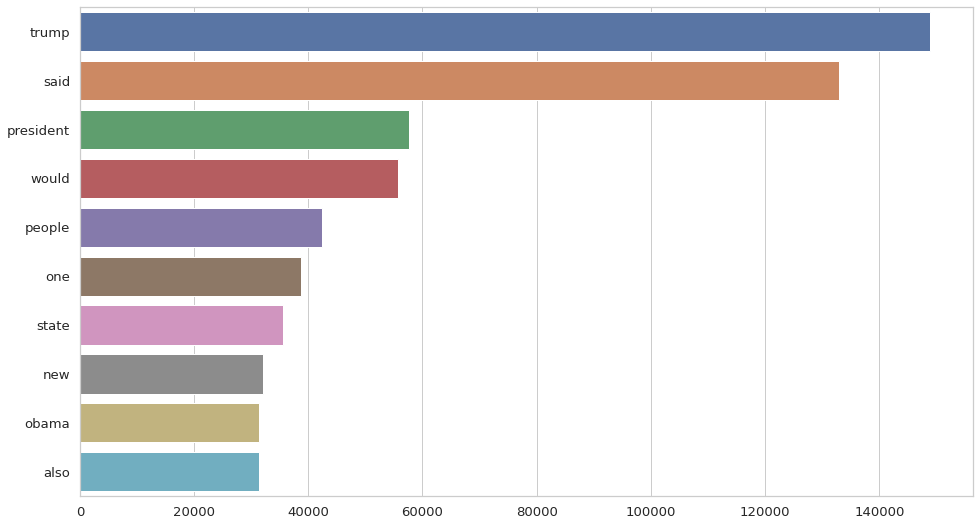

In [ ]:
# Plotting top 10 unigrams
plt.figure(figsize = (16,9))
most_common_uni = get_top_text_ngrams(news_df.cleaned_text, 10, 1)
most_common_uni = dict(most_common_uni)
sns.barplot(x=list(most_common_uni.values()), y=list(most_common_uni.keys()))

<Figure size 1152x648 with 0 Axes>

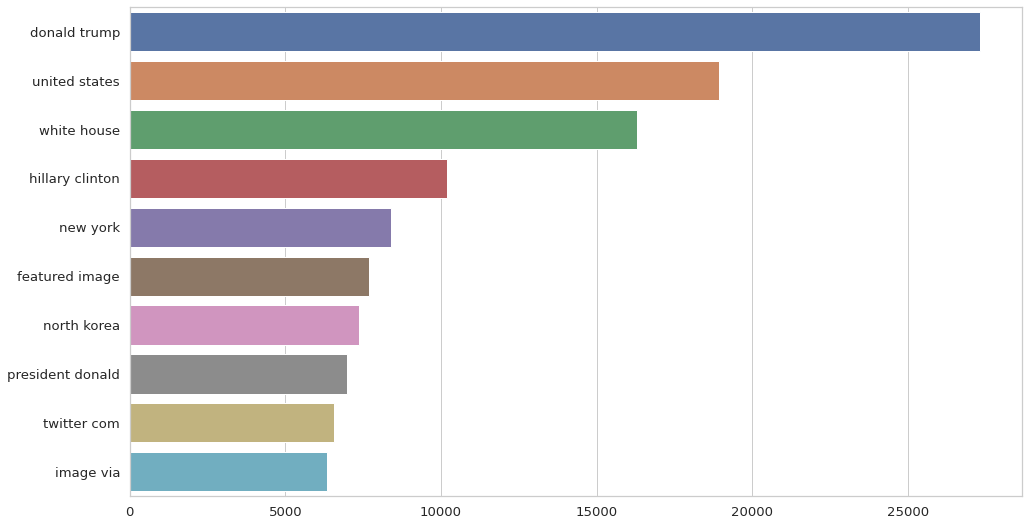

In [ ]:
# Plotting top 10 bigrams
plt.figure(figsize = (16,9))
most_common_uni = get_top_text_ngrams(news_df.cleaned_text, 10, 2)
most_common_uni = dict(most_common_uni)
sns.barplot(x=list(most_common_uni.values()),y=list(most_common_uni.keys()))

<Figure size 1152x648 with 0 Axes>

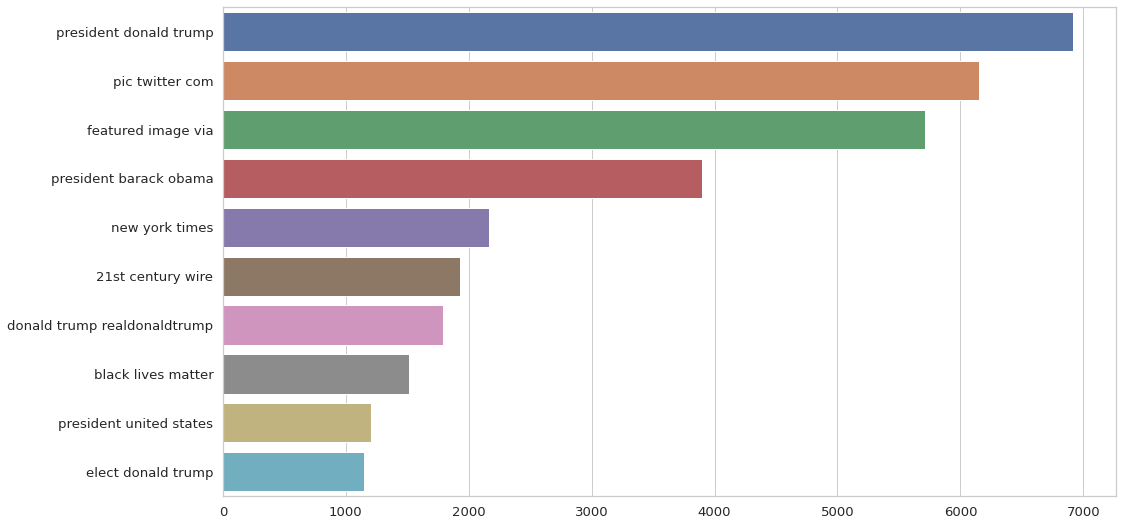

In [ ]:
# Plotting top 10 trigrams
plt.figure(figsize = (16,9))
most_common_uni = get_top_text_ngrams(news_df[news_df.category == 1].cleaned_text, 10, 3)
most_common_uni = dict(most_common_uni)
sns.barplot(x=list(most_common_uni.values()),y=list(most_common_uni.keys()))

# **LSTM Model Creation**

In [ ]:
# Plotting top 10 trigrams
plt.figure(figsize = (16,9))
most_common_uni = get_top_text_ngrams(news_df[news_df.category == 0].cleaned_text, 10, 3)
most_common_uni = dict(most_common_uni)
sns.barplot(x=list(most_common_uni.values()),y=list(most_common_uni.keys()))

In [ ]:
# Train-Remaining Split (70 / 20 / 10) -> (Train / Val / Test)
x_train, x_remaning, y_train, y_remaning = train_test_split(news_df.cleaned_text,
                                                    news_df.category, random_state = 0, train_size=0.7)

In [ ]:
# Validation-Test Split
x_val, x_test, y_val, y_test = train_test_split(x_remaning, y_remaning, random_state=42, train_size=0.66)

In [ ]:
# Maximum Features in Tokenizer and Maximum Length of Document
max_features = 10000
maxlen = 300

In [ ]:
# Defining Tokenizer on entire corpus
tokenizer = text.Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(news_df.cleaned_text)

In [ ]:
# Tokenizing x_train, x_test, x_val
tokenized_train = tokenizer.texts_to_sequences(x_train)
x_train = sequence.pad_sequences(tokenized_train, maxlen=maxlen)

tokenized_test = tokenizer.texts_to_sequences(x_test)
x_test = sequence.pad_sequences(tokenized_test, maxlen=maxlen)

tokenized_val = tokenizer.texts_to_sequences(x_val)
x_val = sequence.pad_sequences(tokenized_val, maxlen=maxlen)

In [ ]:
# Embedding File Path
EMBEDDING_FILE = 'glove.6B.50d.txt'

In [ ]:
# Helper function to get the coefficients.
def get_coefs(word, *arr): 
    return word, np.asarray(arr, dtype='float32')

In [ ]:
# Parsing the text file and converting it into a dictionary
embeddings_index = dict(get_coefs(*o.rstrip().rsplit(' ')) for o in open(EMBEDDING_FILE))

In [ ]:
# Generate Embedding Matrix
all_embs = np.stack(embeddings_index.values())
emb_mean,emb_std = all_embs.mean(), all_embs.std()
embed_size = all_embs.shape[1]

word_index = tokenizer.word_index
nb_words = min(max_features, len(word_index))
embedding_matrix = embedding_matrix = np.random.normal(emb_mean, emb_std, (nb_words, embed_size))
for word, i in word_index.items():
    if i >= max_features: continue
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None: embedding_matrix[i] = embedding_vector

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2828: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  if self.run_code(code, result):


In [ ]:
# Model Parameters
batch_size = 256
epochs = 10
embed_size = 50

In [ ]:
# Defining Neural Network
model = Sequential()

# Non-trainable Embedding Layer
model.add(Embedding(max_features, output_dim=embed_size, weights=[embedding_matrix], input_length=maxlen, trainable=False))

# LSTM 
model.add(LSTM(units=128 , return_sequences = True , recurrent_dropout = 0.25 , dropout = 0.25))
model.add(LSTM(units=64 , recurrent_dropout = 0.1 , dropout = 0.1))
model.add(Dense(units = 32 , activation = 'relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer=Adam(lr = 0.01), loss='binary_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
# Special Learning Rate Reduction
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience = 2, verbose=1, factor=0.5, min_lr=0.00001)

In [ ]:
# Model Summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 300, 50)           500000    
                                                                 
 lstm (LSTM)                 (None, 300, 128)          91648     
                                                                 
 lstm_1 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 32)                2080      
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 643,169
Trainable params: 143,169
Non-trainable params: 500,000
_________________________________________________________________


In [ ]:
# Model Training
history = model.fit(x_train, y_train,
                    validation_data=(x_val, y_val),
                    batch_size=batch_size, epochs=epochs,
                    callbacks=[learning_rate_reduction])

Epoch 1/10
123/123 [==============================] - 382s 3s/step - loss: 0.2994 - accuracy: 0.8657 - val_loss: 0.1402 - val_accuracy: 0.9456 - lr: 0.0100
Epoch 2/10
123/123 [==============================] - 397s 3s/step - loss: 0.1211 - accuracy: 0.9551 - val_loss: 0.0927 - val_accuracy: 0.9681 - lr: 0.0100
Epoch 3/10
123/123 [==============================] - 387s 3s/step - loss: 0.0766 - accuracy: 0.9727 - val_loss: 0.0546 - val_accuracy: 0.9818 - lr: 0.0100
Epoch 4/10
123/123 [==============================] - 381s 3s/step - loss: 0.0559 - accuracy: 0.9803 - val_loss: 0.0504 - val_accuracy: 0.9828 - lr: 0.0100
Epoch 5/10
123/123 [==============================] - 375s 3s/step - loss: 0.0421 - accuracy: 0.9851 - val_loss: 0.0411 - val_accuracy: 0.9875 - lr: 0.0100
Epoch 6/10
123/123 [==============================] - 369s 3s/step - loss: 0.0317 - accuracy: 0.9890 - val_loss: 0.0311 - val_accuracy: 0.9894 - lr: 0.0100
Epoch 7/10
123/123 [==============================] - 365s 3s/st

In [ ]:
# Save the model
model.predict(x_test)

array([[9.9964702e-01],
       [5.5358246e-08],
       [9.9998224e-01],
       ...,
       [3.3776271e-07],
       [3.3227892e-07],
       [6.8689201e-09]], dtype=float32)

In [ ]:
model.evaluate(x_test, y_test, batch_size=256)

18/18 [==============================] - 5s 248ms/step - loss: 0.0150 - accuracy: 0.9956


[0.01504210289567709, 0.9956331849098206]

In [ ]:
# Testing the LSTM model on the test set

In [ ]:
article = """
Emmanuel Macron has held off a challenge from far-right leader Marine Le Pen to retain the French presidency, according to projected results from French polling agencies.

The centrist incumbent is projected to receive between 57 and 58.5 percent of the vote in Sunday's second-round runoff, versus 41.5 to 43 percent for Le Pen, his nationalist rival.

If accurate, Macron will triumph decisively though by a smaller margin than in 2017, when he won by more than 30 percentage points to became France's youngest president. While falling short of the Élysée Palace again, in her third presidential run, Le Pen still looks to have secured the most votes ever for a French far-right candidate.
Le Pen’s challenge to the country’s mainstream order and the West’s unity against Russia had officials in Europe and Washington anxiously following the election amid the war in Ukraine.

She is sympathetic to Russian President Vladimir Putin and skeptical of both NATO and the European Union.

Le Pen conceded defeat in a speech to supporters shortly after the projections were released, but said her unprecedented vote total represented “a shining victory in itself.”

“The ideas we represent are reaching summits,” she said.

After polls closed across France at 8 p.m. local time (2 p.m. ET), polling companies Opinionway, Harris and Ifop worked with media organizations to publish projected results based on early voting patterns. This method has accurately predicted French elections in the past.

The final result will be announced by the country's interior ministry on Monday.

The campaign was beset by apathy, with many voters dissatisfied with either candidate and turnout looking likely to be around two points lower than five years ago.
"""


In [ ]:
tokenized_pred = tokenizer.texts_to_sequences(pd.Series([article]))
x_pred = sequence.pad_sequences(tokenized_pred, maxlen=maxlen)